In [10]:
from google.colab.patches import cv2_imshow

In [13]:
pip uninstall opencv-python opencv-contrib-python -y

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [14]:
pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 7.8 MB/s eta 0:00:00


In [2]:
import cv2
print(cv2.__version__)
print("aruco" in dir(cv2))

4.11.0
True



Processing image...
Detected ArUco Dictionary: DICT_4X4_100
Detected Marker IDs: [70 60]


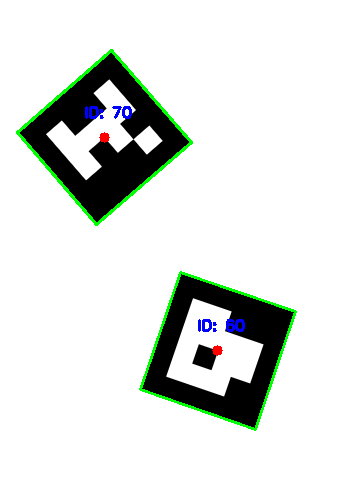

In [12]:
import cv2
import numpy as np
import math

def detect_aruco_markers(image):
    """
    Detects ArUco markers in the image using the correct dictionary.
    Returns the detected dictionary, marker IDs, and their corners.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detected_dict = None
    detected_ids = None
    detected_corners = None

    # Iterate through all predefined dictionaries to find the correct one
    for dict_name in [attr for attr in dir(cv2.aruco) if "DICT" in attr]:
        aruco_dict = cv2.aruco.getPredefinedDictionary(getattr(cv2.aruco, dict_name))
        # Use DetectorParameters() for older OpenCV versions
        aruco_params = cv2.aruco.DetectorParameters()
        corners, ids, _ = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)

        if ids is not None and len(ids) > 0:
            detected_dict = dict_name
            detected_ids = ids
            detected_corners = corners
            break  # Stop once a valid dictionary is found

    return detected_dict, detected_ids, detected_corners

def annotate_aruco_markers(image, ids, corners):
    """
    Annotates the detected ArUco markers on the image.
    """
    if ids is not None:
        for i in range(len(ids)):
            # Draw the marker boundary
            cv2.polylines(image, [np.int32(corners[i])], isClosed=True, color=(0, 255, 0), thickness=2)

            # Calculate the center of the marker
            corner = corners[i][0]
            center_x = int((corner[0][0] + corner[2][0]) / 2)
            center_y = int((corner[0][1] + corner[2][1]) / 2)
            cv2.circle(image, (center_x, center_y), 5, (0, 0, 255), -1)

            # Display the marker ID
            cv2.putText(image, f"ID: {ids[i][0]}", (center_x - 20, center_y - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return image

if __name__ == "__main__":
    # Path to the input image
    image_path = "/content/drive/MyDrive/aruco_1.png"  # Replace with your image path

    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Unable to load image at {image_path}")
    else:
        print("\nProcessing image...")

        # Detect ArUco markers
        detected_dict, ids, corners = detect_aruco_markers(image)

        if detected_dict:
            print(f"Detected ArUco Dictionary: {detected_dict}")
            print(f"Detected Marker IDs: {ids.flatten()}")
        else:
            print("No ArUco markers detected.")

        # Annotate the image with detected markers
        annotated_image = annotate_aruco_markers(image, ids, corners)

        # Display the annotated image
        cv2_imshow(annotated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()